In [232]:
import csv
import os
import pandas as pd
import matplotlib
from datetime import datetime, timedelta

# Data extraction

In [233]:
path =  r'C:\Users\01est\Documents\data projects\GDP\gdp_data\historical_gdp.csv'
gdp_data = pd.read_csv(path, skiprows=4)

# Data cleaning

In [234]:
#drop unecessary columns
gdp_data = gdp_data.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'])
#set index
gdp_data.set_index('Country Name', inplace=True) #inplace= is very important
gdp_data.T.index.name = 'years'

rename_dict = {i: datetime.strptime(i, "%Y").date()\
               for i in gdp_data.T.index.get_level_values('years')}

#convert year to datetime object
gdp_data = gdp_data.T.rename(index = rename_dict)
gdp_data.T

years,1960-01-01,1961-01-01,1962-01-01,1963-01-01,1964-01-01,1965-01-01,1966-01-01,1967-01-01,1968-01-01,1969-01-01,...,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23512.602600,24985.993280,24713.698050,25025.099560,25533.569780,25796.380250,25239.600410,25630.266490,NaN,NaN
Afghanistan,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,137.594352,160.898589,129.108323,129.329713,...,543.303042,591.162347,641.872034,637.165044,613.856333,578.466353,547.228110,556.302138,520.896603,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3587.883798,4615.468028,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942,3432.385736,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4094.362119,4437.178067,4247.614279,4413.081743,4578.666720,3952.829458,4124.108907,4532.890162,5268.848504,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39736.354060,41100.729940,38392.943900,40626.751630,42300.334130,36039.653500,37224.108920,39134.393370,42029.762740,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3283.483451,3736.700833,3600.575965,3876.970676,4054.716970,3574.241120,3697.129595,3948.052670,4302.276483,NaN
"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1334.784845,1374.621313,1446.536280,1607.152275,1674.002766,1608.744312,1139.870568,963.494721,944.408499,NaN
South Africa,443.009816,454.962013,473.011615,511.497253,548.995942,584.704072,621.220825,675.135312,711.225810,780.625919,...,7328.615629,8007.412846,7501.469984,6832.456891,6433.187277,5734.633629,5272.918425,6132.479841,6374.028196,NaN


## GDP increase

In [396]:
import numpy as np
from collections import OrderedDict

def rate_normalized(dataFrame):
    '''
    calculates rate of change and returns a normalized ROC
    value based on the previous value, operates on columns, down row for 
    ''' 
    rate_of_change = OrderedDict() #dictionary of dictionaries with gdp history
    for country, gdpHist in dataFrame.iterrows(): #start row iteration
      
        cur = None
        cur_i = None
        prev = None
        prev_i = None
        year_ROC = OrderedDict()
        
        for i, (year, gdp) in enumerate(gdpHist.iteritems()): #start column iteration
            if pd.notnull(gdp): # save item that is not null
                cur = gdp
                cur_i = i   
            if pd.isnull(prev): # stablish 1st prev: once per column iteration
                prev = cur
                prev_i = cur_i
            if cur_i != prev_i: #check if operation can be done. Cur_i == prev_i only when loop
                #has not found a new pair
                ROC = (cur - prev) / (cur_i - prev_i) # perform operation for Rate Of Change
                
                #year_ROC[year] = ROC
                year_ROC[year] = ROC/prev #normalize rate of change
                
                prev = cur # set prev to cur for next loop
                prev_i = cur_i #set prev to cur for next loop
        rate_of_change[country] = year_ROC
    return rate_of_change

# Datasets

### gdp_rate


In [397]:

gdp_rate = pd.DataFrame(rate_normalized(gdp_data.T))

gdp_rate.index.name = 'years'
gdp_rate.columns.name = 'countries'
gdp_rate.sort_values(by='years',inplace=True)

gdp_rate.head()

countries,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
years,,,,,,,,,,,,,,,,,,,,,
1961-01-01,NaN,0.001467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.026403,NaN,NaN,NaN,0.026980,-0.052314,0.007228
1962-01-01,NaN,-0.023435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.054941,NaN,NaN,NaN,0.039673,-0.033921,-0.014743
1963-01-01,NaN,0.346375,NaN,NaN,NaN,NaN,NaN,-0.264372,NaN,NaN,...,NaN,NaN,NaN,0.055289,NaN,NaN,NaN,0.081363,0.006202,0.002859
1964-01-01,NaN,0.043057,NaN,NaN,NaN,NaN,NaN,0.379786,NaN,NaN,...,NaN,NaN,NaN,0.073444,NaN,NaN,NaN,0.073312,0.133185,0.014699
1965-01-01,NaN,0.231598,NaN,NaN,NaN,NaN,NaN,0.090242,NaN,NaN,...,NaN,NaN,NaN,0.067038,NaN,NaN,NaN,0.065043,0.251244,0.041733


### gdp_data

In [398]:
gdp_data.index.name = 'countries'
gdp_data.columns.name = 'years'

# Question: Mexico has a new president every 6 years. What's the correlation between presidents and GDP?

Index(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'Arab World',
       'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa',
       ...
       'Virgin Islands (U.S.)', 'Vietnam', 'Vanuatu', 'World', 'Samoa',
       'Kosovo', 'Yemen, Rep.', 'South Africa', 'Zambia', 'Zimbabwe'],
      dtype='object', name='countries', length=264)


<AxesSubplot:xlabel='years'>

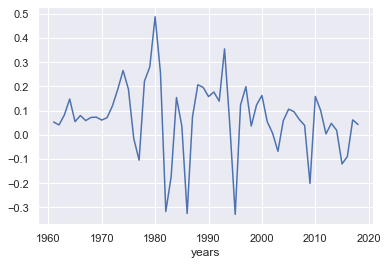

In [399]:
print(gdp_rate.columns)

# Quick-plot mexico's historical GDP rate
gdp_rate.loc[:,'Mexico'].plot()

<AxesSubplot:xlabel='countries'>

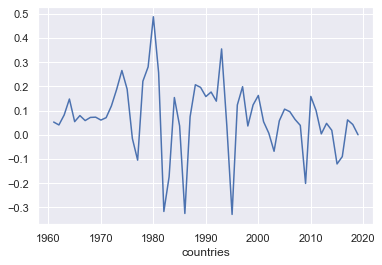

In [400]:
gdp_data.pct_change(periods=1, fill_method='pad').loc[:,'Mexico'].plot()

<AxesSubplot:xlabel='years'>

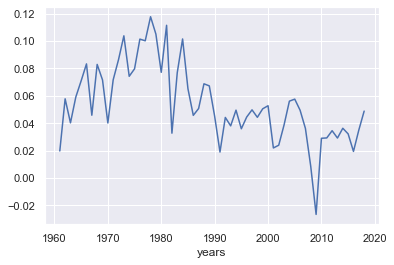

In [401]:
# Quick-plot mexico's historical GDP 
gdp_rate.loc[:,'United States'].plot()

### Plotting GDP and GDP rate: Mexico

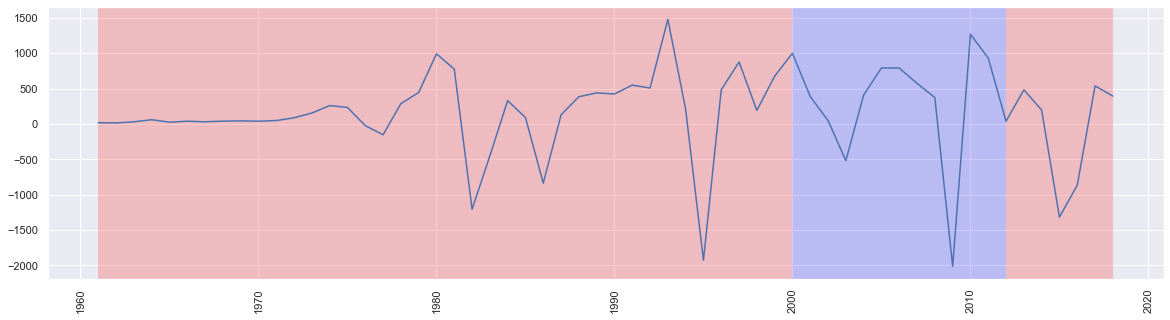

In [362]:
import matplotlib.pyplot as plt
import seaborn as sns

#seaborn settings
sns.set()

#initializing figure's canvas
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,1,1)

#plot
ax1.plot(gdp_rate.loc[:,'Mexico'])

#modifying plot's labels
plt.xticks(rotation='vertical')

def highlight_background(indices,ax,color):
    '''Highlights multiple parts of a graph in blue'''
    '''indeces: a list of touples'''
    i=0
    while i<len(indices):
        ax.axvspan(indices[i][0], indices[i][1], facecolor=color, edgecolor='none', alpha=.2)
        i+=1

#get list of valid presidents
pri_term = [('1961','2000'),('2012','2018')]
highlight_background(pri_term, ax1, 'red')

pan_term = [('2000', '2012')]
highlight_background(pan_term, ax1, 'blue')

#saving the figure
plt.savefig("gdp.jpeg",bbox_inches='tight',dpi=100)

# Effect of president's political party on gdp - The United States of America

In [363]:
#searching for presidents after 1961
years_mask = US_presidents['start'].apply(lambda t: t.year >= 1961)
p_1961_terms = US_presidents[years_mask]

### US_presidents

In [364]:
import json
#loading US_presidents and their terms
with open(r'C:\Users\01est\Documents\data projects\GDP\gdp_data\presidents.json', 'r') as infile:
        US_presidents = pd.DataFrame(json.load(infile)).T
#converting string date to a datetime object
US_presidents['start'] = US_presidents['start'].apply(lambda t: datetime.strptime(t, "%Y-%m-%d").date())
US_presidents['end'] = US_presidents['end'].apply(lambda t: datetime.strptime(t, "%Y-%m-%d").date())

In [366]:
democrats_terms = p_1961_terms[p_1961_terms['party'].apply(lambda t: t == 'Democratic')][['start','end']].values

gdp_data.loc[:, 'United States'][1:-1].values
yb = gdp_rate.loc[:, 'United States'].values

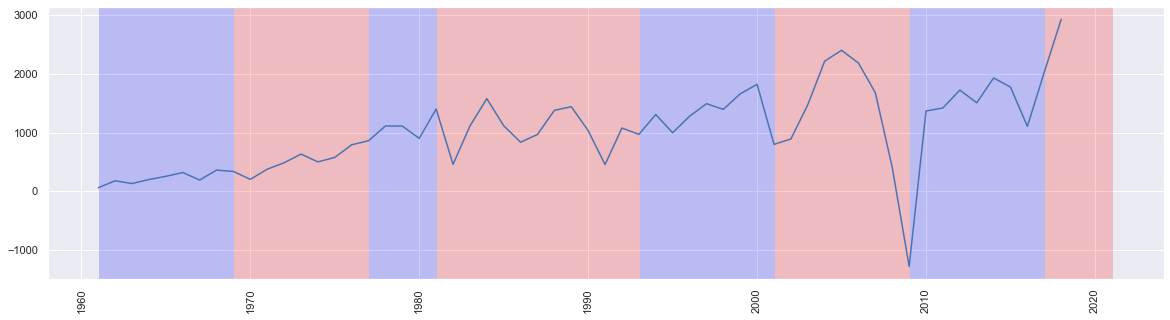

In [368]:
#initializing figure's canvas
fig2 = plt.figure(figsize=(20,5))
ax2 = fig2.add_subplot(1,1,1)

#basic plot 
xa = gdp_data[1:-1].index
ya = gdp_data.loc[:, 'United States'][1:-1].values
yb = gdp_rate.loc[:, 'United States'].values

ax2.plot(xa, yb)
#ax2.plot(xa, ya)

#modifying plot's labels
plt.xticks(rotation='vertical')

#modifying background
def highlight_background(indices,ax,color):
    '''Highlights multiple parts of a graph in blue'''
    '''indeces: a list of touples'''
    i=0
    while i<len(indices):
        ax.axvspan(indices[i][0], indices[i][1], facecolor=color, edgecolor='none', alpha=.2)
        i+=1

#highlighting background
democrats_terms = p_1961_terms[p_1961_terms['party'].apply(lambda t: t == 'Democratic')][['end','start']].values
highlight_background(democrats_terms, ax2, 'blue')

republicans_terms = p_1961_terms[p_1961_terms['party'].apply(lambda t: t == 'Republican')][['end','start']].values
highlight_background(republicans_terms, ax2, 'red')

#saving the figure
plt.savefig("gdp_usa.jpeg",bbox_inches='tight',dpi=100)

In [369]:
p_1961_terms
US_presidents
#for country in gdp_rate.columns.values:

,number,start,end,party
George Washington,1,1789-04-30,1797-03-04,Unaffiliated
John Adams,2,1797-03-04,1801-03-04,Federalist
Thomas Jefferson,3,1801-03-04,1809-03-04,Democratic-Republican
James Madison,4,1809-03-04,1817-03-04,Democratic-Republican
James Monroe,5,1817-03-04,1825-03-04,Democratic-Republican
John Quincy Adams,6,1825-03-04,1829-03-04,Democratic-Republican
Andrew Jackson,7,1829-03-04,1837-03-04,Democratic
Martin Van Buren,8,1837-03-04,1841-03-04,Democratic
William Henry Harrison,9,1841-03-04,1841-04-04,Whig
John Tyler,9,1841-03-04,1841-04-04,Whig


In [370]:
gdp_rate

countries,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
years,,,,,,,,,,,,,,,,,,,,,
1961-01-01,NaN,0.087680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,11.935557,NaN,NaN,NaN,11.952197,-12.146730,2.015251
1962-01-01,NaN,-1.402859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,25.492291,NaN,NaN,NaN,18.049602,-7.464014,-4.140170
1963-01-01,NaN,20.248373,NaN,NaN,NaN,NaN,NaN,-305.585433,NaN,NaN,...,NaN,NaN,NaN,27.062929,NaN,NaN,NaN,38.485637,1.318317,0.790934
1964-01-01,NaN,3.388843,NaN,NaN,NaN,NaN,NaN,322.933476,NaN,NaN,...,NaN,NaN,NaN,37.936952,NaN,NaN,NaN,37.498689,28.487892,4.078725
1965-01-01,NaN,19.013074,NaN,NaN,NaN,NaN,NaN,105.875219,NaN,NaN,...,NaN,NaN,NaN,37.171130,NaN,NaN,NaN,35.708131,60.897578,11.750414
1966-01-01,NaN,36.486047,NaN,NaN,NaN,NaN,NaN,-6.310454,NaN,NaN,...,NaN,NaN,NaN,37.000846,NaN,NaN,NaN,36.516752,40.091573,-16.074981
1967-01-01,NaN,23.304237,NaN,NaN,NaN,NaN,NaN,-210.259426,NaN,NaN,...,NaN,NaN,NaN,27.142673,NaN,NaN,NaN,53.914487,16.828135,15.036538
1968-01-01,NaN,-31.790266,NaN,NaN,NaN,NaN,NaN,78.536929,NaN,NaN,...,NaN,NaN,NaN,38.056647,NaN,NaN,NaN,36.090498,49.573731,7.128222
1969-01-01,NaN,0.221390,NaN,NaN,NaN,15.218023,NaN,187.978178,NaN,NaN,...,NaN,NaN,NaN,55.789266,NaN,NaN,NaN,69.400108,76.097269,42.586018


In [371]:
type(gdp_rate)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='years'>

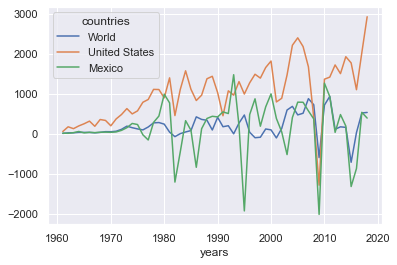

In [378]:
gdp_rate.loc[:,['World','United States','Mexico']].plot()

In [381]:
a = gdp_data.pct_change(periods=1, fill_method='pad')

<AxesSubplot:xlabel='countries'>

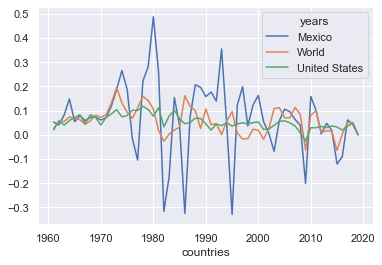

In [389]:
a.loc[:,['Mexico','World','United States']].plot()

<AxesSubplot:xlabel='years'>

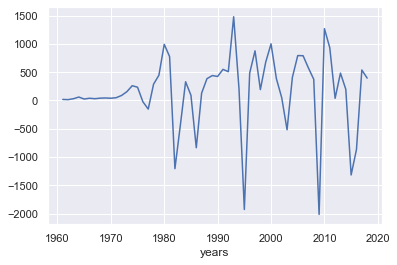

In [388]:
gdp_rate.loc[:,'Mexico'].plot()